In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

## The HDF5 event files
The dataframes (called 'Particles') are stored in HDF5 files. There is one file for simulated 2vbb events, and one file for simulated background events. The backrounds simulated are Tl208, Bi214, Co60, and K40.

For the backgrounds, there is one entry per event, and for 2vbb, there are two entries per event (one for each primary electron). All of the 2vbb events can be keyed by the 'event' attribute, which is unique.

In [2]:
'''
Load in dataframe:
'''

fname = './files/BG_NEW_1d.h5'
df_particles = pd.read_hdf(fname, 'Particles')

In [3]:
'''
Look at which variables are stored in BG the dataframe:
'''
print('True background variables:')
print(df_particles.columns.tolist()[:8])
print()
print('Reconstructed background variables:')
print(df_particles.columns.tolist()[8:])

True background variables:
['event', 'initial_x', 'initial_y', 'initial_z', 'n_brems', 'n_electrons', 'mass_number', 'region']

Reconstructed background variables:
['nS2', 'reco_energy', 'reco_length', 'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min', 'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max', 'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave', 'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z', 'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x', 'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y', 'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy']


# Analysis cuts:
Recreate the NEXT NEW 2vbb analysis cuts:<br>
<img src="images/slide_procedure.png" width=600><br>
From Alberto's CM slides: <br>
https://next.ific.uv.es/DocDB/0009/000981/001/MC-data_efficiencies_studies_MC_november.pdf

In [8]:
'''
Make fiducial and S2 cuts for all data:
'''

df_particles = df_particles[(df_particles['nS2'] == 1)&(df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)&(df_particles['reco_r_max'] < 178)]

In [9]:
'''
Make remaining analysis cuts here:
'''

df_particles_selection = df_particles[(df_particles['reco_numb_of_tracks'] == 1)&(df_particles['reco_ovlp_blob_energy'] == 0.0)
                                      &(df_particles['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]
print('Background selection efficiency: %s'%(len(df_particles_selection)/len(df_particles)))

Background selection efficiency: 0.11400024646652321


# Reconstructed energy distribution of final background event selection

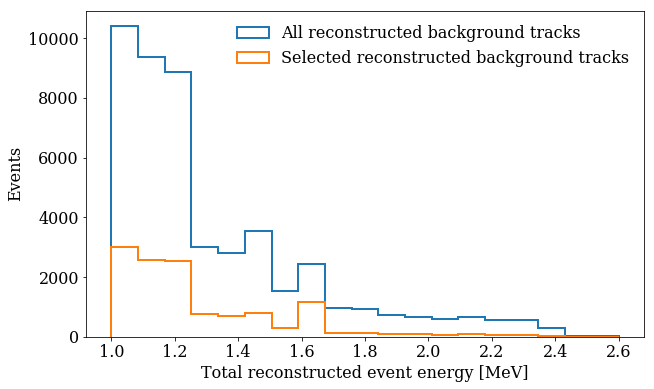

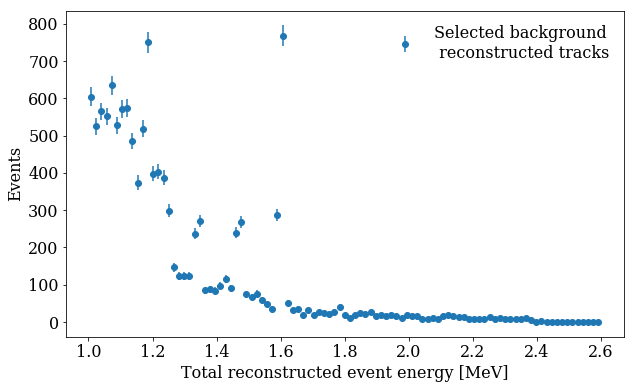

In [10]:
'''
Plot the energy of the reconstructed tracks before and after selection.
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,20)
plt.hist(df_particles['reco_energy'], bins=ebins, histtype='step', lw=2, label='All reconstructed background tracks');
plt.hist(df_particles_selection['reco_energy'], bins=ebins, histtype='step', lw=2, label='Selected reconstructed background tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected background\n reconstructed tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

# Distributions of physics variables
We can look at the distribution of physical variables in the full generated background set and compare it to the selected set of variables.
<br>
First we look at the atomic mass radioactive isotope that produced the event. The isotopes that were simulated are: $^{40}$K, $^{60}$Co, $^{208}$Tl, $^{214}$Bi. Next, we look at the number of electrons produced in the background event with a kinetic energy greater than 100 keV. Finally, we look at the number of photons produced through the Bremsstrahlung process in the background event.

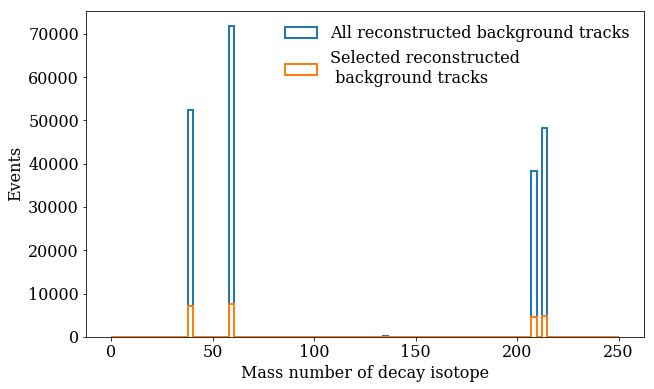

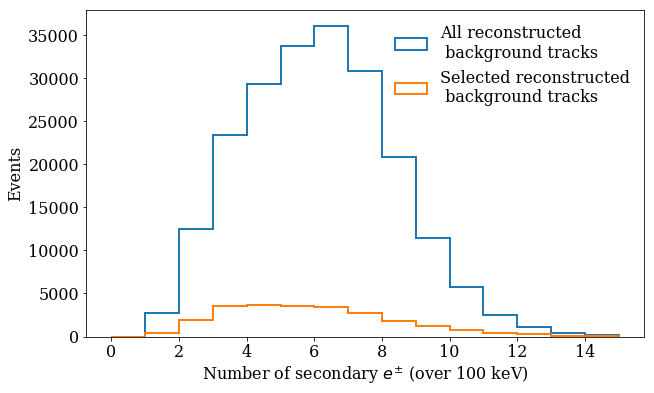

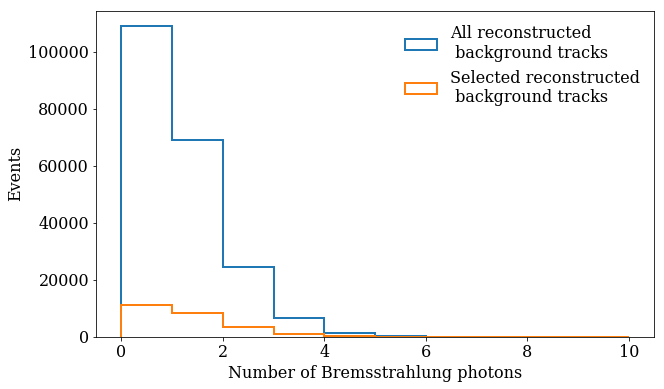

In [15]:
'''
Plot some MC true variables.
'''

plt.figure(figsize=(10,6))

mbins=np.linspace(0,250,100)
plt.hist(df_particles['mass_number'], bins=mbins, histtype='step', lw=2, label='All reconstructed background tracks');
plt.hist(df_particles_selection['mass_number'], bins=mbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel('Mass number of decay isotope', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

elbins = np.linspace(0,15,16)
plt.hist(df_particles['n_electrons'], bins=elbins, histtype='step', lw=2, label='All reconstructed\n background tracks');
plt.hist(df_particles_selection['n_electrons'], bins=elbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel(r'Number of secondary $e^{\pm}$ (over 100 keV)', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

brbins = np.linspace(0,10,11)
plt.hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, label='All reconstructed\n background tracks');
plt.hist(df_particles_selection['n_brems'], bins=brbins, histtype='step', lw=2, label='Selected reconstructed\n background tracks');

plt.xlabel(r'Number of Bremsstrahlung photons', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

# Effect on event selection from varying physics variables
There is some uncertainty in the true distribution of each of these variables. We can look and see how the reconstructed energy distribution of our final event selection would change if we vary these distributions.
<br>
We can do this by applying "weights" to events. If we assume that some events are underestimated, we weight them higher, and if we assume they are overestimated, we weight them lower. These weights are propagated through to the final reconstructed energy distribution where we can evaluate the effect.

## Bremsstrahlung
First, we look at what happens to the reconstructed energy distribution if the number of photons produced through Bremsstrahlung tends to be larger or smaller than what is predicted.
<br>
In the first example, we shift the true number of brems higher. The weights are generated assuming the brem rate is 5% higher. To determine the weights, we assume that the number of brems follows a Poisson distribution with a rate of $\lambda$. The value of $\lambda$ is caclulated from the mean of the number of brems:

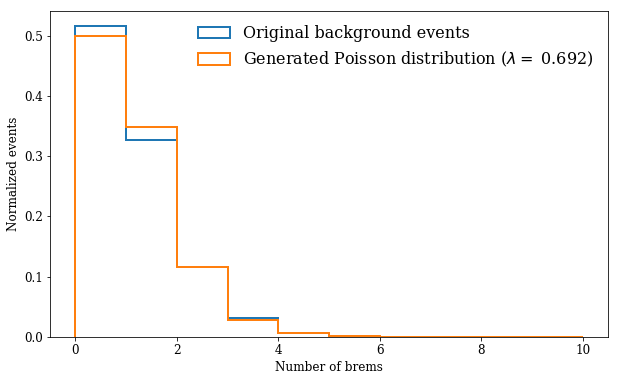

In [17]:
plt.figure(figsize=(10,6))

rate0 = df_particles['n_brems'].mean()
brem_pois = np.random.poisson(rate0, 10000)

plt.hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, density=True, label='Original background events');
plt.hist(brem_pois, bins=brbins, histtype='step', lw=2, density=True, label=r'Generated Poisson distribution ($\lambda =$ %2.3f)'%rate0)

plt.ylabel('Normalized events', fontsize=12)
plt.xlabel('Number of brems', fontsize=12)

plt.tick_params(which='major', axis='both', labelsize=12)
plt.tick_params(which='major', axis='both', labelsize=12)

plt.legend(loc='upper right', fontsize=16)

Since the distribution of the number of brems and the distribution of the reconstructed energy are not independent of eachother, reweighting the events based on number of brems will change the energy distribution, which we don't want to do. To avoid this problem, we can reweight the brem distribution individually for energy slices. Then, when sampling, we can randomly vary the energy slices (bin widths) to average out the effect on the energy distribution.

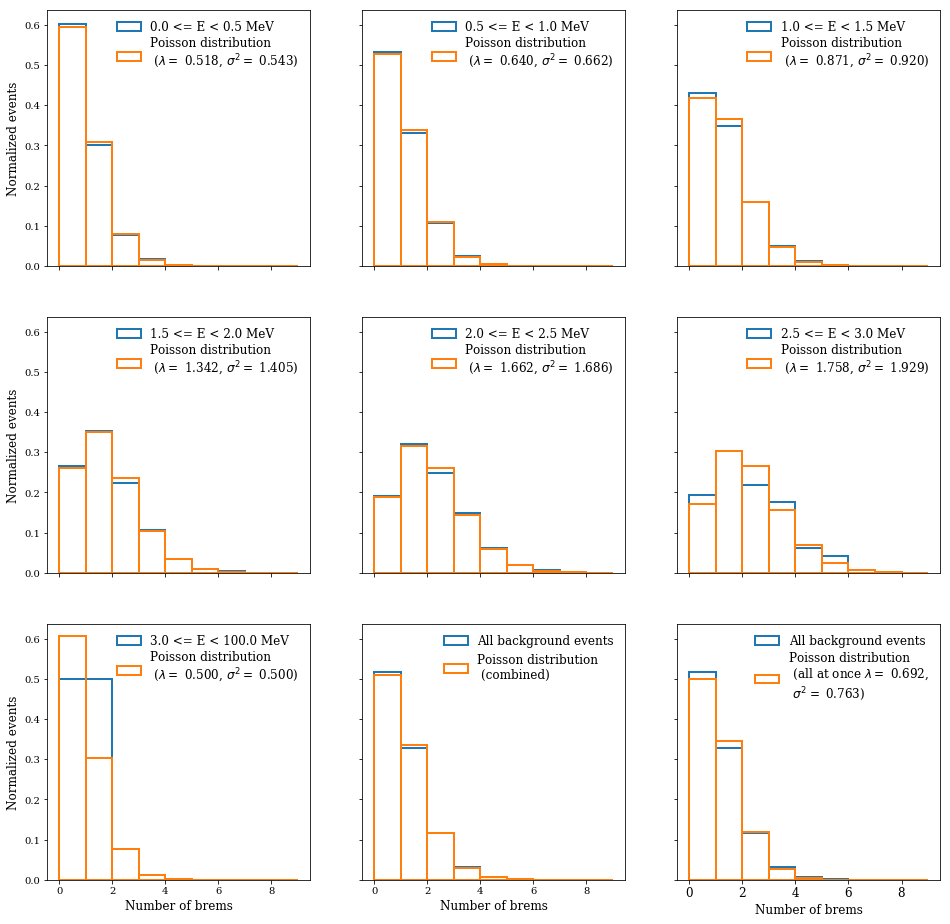

In [31]:
fig, ax = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(16,16))

brbins = np.linspace(0,8,9)
ebins = np.arange(0,4.0,0.5)
ebins[-1] = 100.
bw = brbins[2] - brbins[1]
brem_pois_all = np.zeros(len(brbins))
brem_pois_m_all = np.zeros(len(brbins))
for i in range(len(ebins)-1):
    eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
    rate0 = df_particles[eslice]['n_brems'].mean()
    var0 = df_particles[eslice]['n_brems'].var()
    brem_pois = np.exp(-1*rate0)*np.power(rate0,brbins)/factorial(brbins)
    brem_pois_m = np.exp(-1*mean0)*np.power(mean0,brbins)/factorial(brbins)
    ax[int(i/3)][i%3].hist(df_particles[eslice]['n_brems'], bins=brbins, histtype='step', lw=2, density=True, label='%s <= E < %s MeV'%(ebins[i],ebins[i+1]));
    ax[int(i/3)][i%3].bar(brbins+0.5, brem_pois, width=bw, color='None', edgecolor='C1', lw=2, label='Poisson distribution\n ($\lambda =$ %2.3f, $\sigma^2=$ %2.3f)'%(rate0,var0))
    brem_pois_all += brem_pois*len(df_particles[eslice])

ax[2][1].hist(df_particles['n_brems'], bins=brbins, density=True, histtype='step', lw=2, label='All background events');
ax[2][1].bar(brbins+0.5, brem_pois_all/len(df_particles), width=bw, color='None', edgecolor='C1', lw=2, label='Poisson distribution\n (combined)')

rate0_n = df_particles['n_brems'].mean()
var0_n = df_particles['n_brems'].var()
brem_pois_n = np.exp(-1*rate0_n)*np.power(rate0_n,brbins)/factorial(brbins)
ax[2][2].hist(df_particles['n_brems'], bins=brbins, density=True, histtype='step', lw=2, label='All background events');
ax[2][2].bar(brbins+0.5, brem_pois_n, width=bw, color='None', edgecolor='C1', lw=2, label='Poisson distribution\n (all at once $\lambda =$ %2.3f,\n $\sigma^2=$ %2.3f)'%(rate0_n,var0_n))

ax[0][0].set_ylabel('Normalized events', fontsize=12)
ax[1][0].set_ylabel('Normalized events', fontsize=12)
ax[2][0].set_ylabel('Normalized events', fontsize=12)
ax[2][0].set_xlabel('Number of brems', fontsize=12)
ax[2][1].set_xlabel('Number of brems', fontsize=12)
ax[2][2].set_xlabel('Number of brems', fontsize=12)
plt.tick_params(which='major', axis='both', labelsize=12)

ax[0][0].legend(loc='upper right', fontsize=12)
ax[0][1].legend(loc='upper right', fontsize=12)
ax[0][2].legend(loc='upper right', fontsize=12)
ax[1][0].legend(loc='upper right', fontsize=12)
ax[1][1].legend(loc='upper right', fontsize=12)
ax[1][2].legend(loc='upper right', fontsize=12)
ax[2][0].legend(loc='upper right', fontsize=12)
ax[2][1].legend(loc='upper right', fontsize=12)
ax[2][2].legend(loc='upper right', fontsize=12)

The weight function is shown in the bottom plot in the following cell. The top plot shows the change in the distribution of the number of brems of all of the generated events.
<br><br>
To generate the weights, we use the Poisson distribution:
<br>
$f(k) = e^{-\lambda}\frac{\lambda^k}{k!}$,
<br>
where $\lambda$ is the Bremsstrahlung rate and $k$ is the number of brems. To calculate the weights, we take the ratio of Poisson's with the new rate to the old rate:
<br>
$w_k = f_1(k)/f_0(k) = e^{-(\lambda_1 - \lambda_0)}(\frac{\lambda_1}{\lambda_0})^k$.
<br>
Here, we assume that the new rate is 5% higher than the old ($\lambda_1 = \lambda_0 (1 + 0.05)$). 
We then multiply the weights by a normalization factor, so that they add to the total number of events in the selection:
<br>
$\sum w = N_{selection}$.


/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


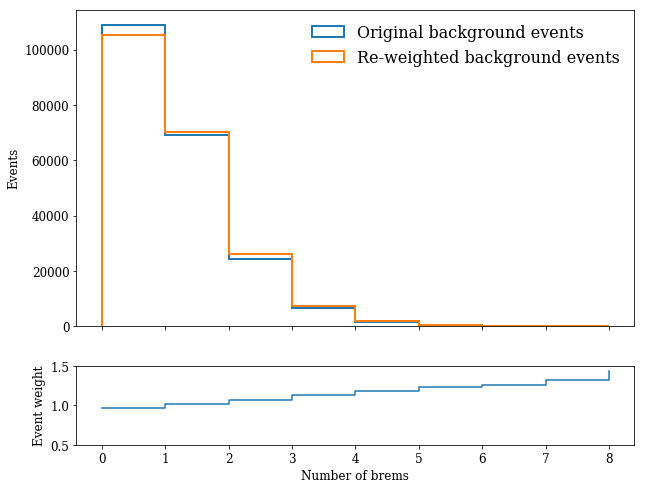

In [34]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

syst_unc = 0.05
eslice_width = 0.5
ebins = np.arange(0, 4.0, eslice_width)
ebins[-1] = 100.
df_particles['weight_plus'] = 1.
df_particles_selection['weight_plus'] = 1.
for i in range(len(ebins)-1):
    eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
    rate0 = df_particles[eslice]['n_brems'].mean()
    rate1 = rate0*(1 + syst_unc)
    df_particles.loc[eslice, 'weight_plus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles['n_brems']
    df_particles_selection.loc[eslice, 'weight_plus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles_selection[eslice]['n_brems']

ax[0].hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, label='Original background events');
ax[0].hist(df_particles['n_brems'], weights=df_particles['weight_plus'], bins=brbins, histtype='step', lw=2, label='Re-weighted background events');

ax[1].step(brbins, df_particles.groupby('n_brems')['weight_plus'].first(), where='post')
ax[1].set_ylim(0.5, 1.5)

ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Number of brems', fontsize=12)

ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)

ax[0].legend(loc='upper right', fontsize=16)

Now we can look at the change in the reconstructed energy distribution of the final background selection.

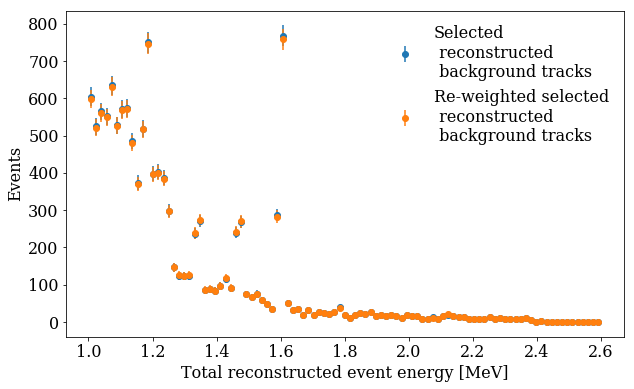

In [35]:
plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)
energy_counts_reweight,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins, weights=df_particles_selection['weight_plus'])

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected\n reconstructed\n background tracks');
plt.errorbar(bin_centers, energy_counts_reweight, yerr=np.sqrt(energy_counts_reweight), fmt='o', label='Re-weighted selected\n reconstructed\n background tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

In the next example, we do the same thing, except now we assume that the number of brems were overestimated.
<br>
The new weights increase decrease the brem rate by 5%.
<br>
$\lambda_1 = \lambda_0 (1 - 0.05)$.

/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


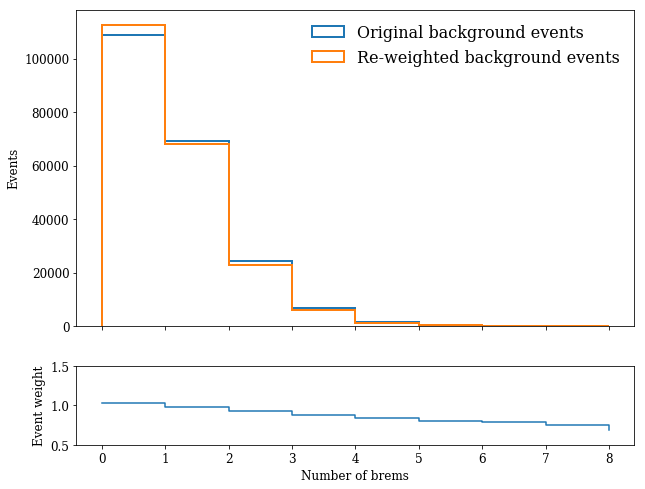

In [38]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

syst_unc = 0.05
eslice_width = 0.5
ebins = np.arange(0, 4.0, eslice_width)
ebins[-1] = 100.
df_particles['weight_minus'] = 1.
df_particles_selection['weight_minus'] = 1.
for i in range(len(ebins)-1):
    eslice = (df_particles['reco_energy'] >= ebins[i])&(df_particles['reco_energy'] < ebins[i+1])
    rate0 = df_particles[eslice]['n_brems'].mean()
    rate1 = rate0*(1 - syst_unc)
    df_particles.loc[eslice, 'weight_minus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles['n_brems']
    df_particles_selection.loc[eslice, 'weight_minus'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles_selection[eslice]['n_brems']

ax[0].hist(df_particles['n_brems'], bins=brbins, histtype='step', lw=2, label='Original background events');
ax[0].hist(df_particles['n_brems'], weights=df_particles['weight_minus'], bins=brbins, histtype='step', lw=2, label='Re-weighted background events');

ax[1].step(brbins, df_particles.groupby('n_brems')['weight_minus'].first(), where='post')
ax[1].set_ylim(0.5, 1.5)

ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Number of brems', fontsize=12)

ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)

ax[0].legend(loc='upper right', fontsize=16)

Now we can look at the change in the reconstructed energy distribution of the final background selection.

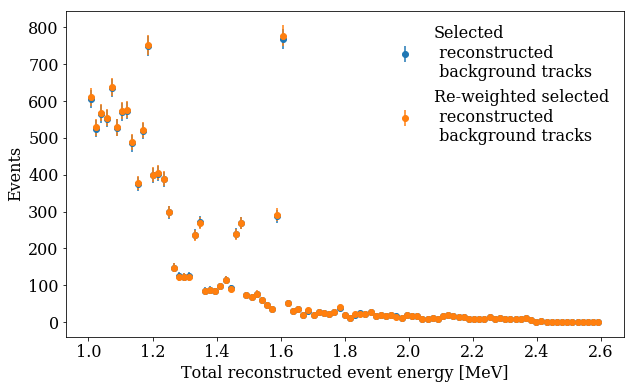

In [39]:
plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)
energy_counts_reweight,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins, weights=df_particles_selection['weight_minus'])

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected\n reconstructed\n background tracks');
plt.errorbar(bin_centers, energy_counts_reweight, yerr=np.sqrt(energy_counts_reweight), fmt='o', label='Re-weighted selected\n reconstructed\n background tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

In [12]:
#creating the two matrices for the plus and minus weights
weight_all = np.zeros((20,len(df_particles_selection['n_brems'])))

#Begin for loop that calculates the plus and minus weights for each uncertainty from 1% - 10%
for j in range(0,20):
    
    #calculates the plus weights for a random uncertainty from the normal distribution
    syst_unc = np.random.normal(0, 0.1)
    print(syst_unc)
    rate0 = 0.7
    rate1 = rate0*(1 + syst_unc)
    df_particles['weight'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles['n_brems']
    df_particles_selection['weight'] = np.exp(-(rate1-rate0))*(rate1/rate0)**df_particles_selection['n_brems']
    weight_norm = len(df_particles)/df_particles['weight'].sum()
    df_particles['weight'] = df_particles['weight']*weight_norm
    df_particles_selection['weight'] = df_particles_selection['weight']*weight_norm

    #stores the plus weights for an uncertainty
    weight_all[j] = df_particles_selection['weight']


0.035512835506318556
0.0037237835401083153
0.030082890750678284
0.0397181204040106
-0.008049341265072155
0.07904972514639767

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()



0.004798067060612697
-0.03573720658967678
-0.05420619954041912
0.007556307598551449
-0.15459053447736326
-0.06525073343125963
0.23275937576049777
-0.13213303379470878
-0.10621563721171419
-0.058562184733148816
-0.018425226964287996
0.12272979643865876
0.03015295246645768
0.0695123747110523


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


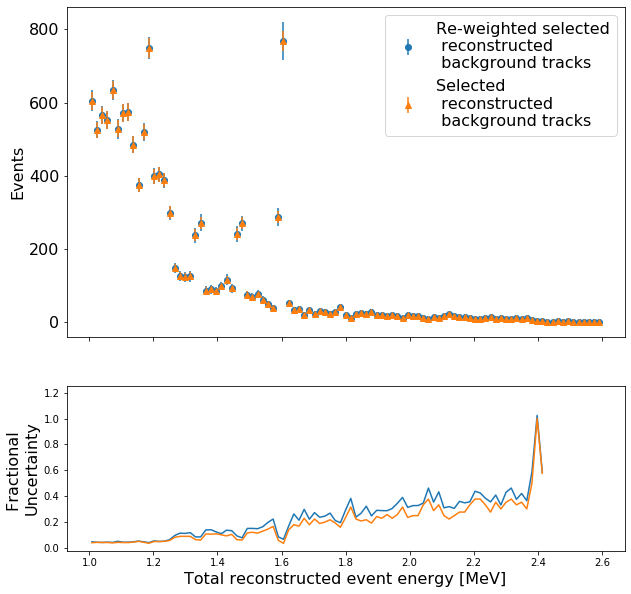

In [35]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins)

#Creating matrices for the total and average histogram counts
energy_counts_reweight_all = np.zeros((20,len(energy_counts)))
energy_counts_reweight = np.zeros(len(energy_counts))

#For loop that stores the histogram values for the counts into the previously created matrices
for i in range(0,20):
    energy_counts_reweight_hist,_ = np.histogram(df_particles_selection['reco_energy'], bins=ebins, weights=weight_all[i])
    energy_counts_reweight_all[i] = energy_counts_reweight_hist

#Calcluates the average of all the values and stores that into the energy_counts_reweight matrix
energy_counts_reweight = energy_counts_reweight_all.mean(0)
#Calculates the standard deviation of the calculated values and the sqrt of the counts for the total error
yerr_tot = energy_counts_reweight_all.std(0) + np.sqrt(energy_counts_reweight)


# Reweighted Counts
ax[0].errorbar(bin_centers, energy_counts_reweight, yerr=yerr_tot, fmt='o', label='Re-weighted selected\n reconstructed\n background tracks');
#Original counts - Not Reweighted
ax[0].errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='^', label='Selected\n reconstructed\n background tracks');

ax[1].plot(bin_centers, yerr_tot/energy_counts_reweight, bin_centers, np.sqrt(energy_counts)/energy_counts)

ax[1].set_xlabel('Total reconstructed event energy [MeV]', fontsize=16)
ax[0].set_ylabel('Events', fontsize=16)
ax[1].set_ylabel('Fractional \nUncertainty', fontsize = 16)
ax[0].tick_params(which='major', axis='both', labelsize=16)

ax[0].legend(loc='upper right', fontsize=16)